# Implementing the hidden layer


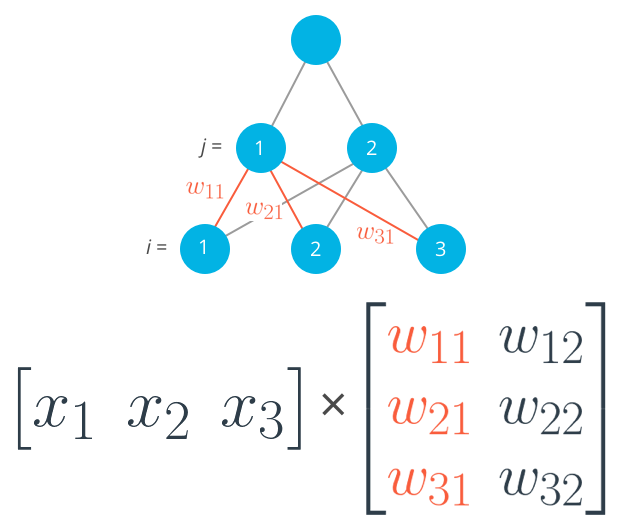

Calculating the input to the first hidden unit with the first column of the weights matrix.

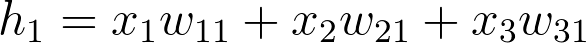

In NumPy, you can do this for all the inputs and all the outputs at once using ```np.dot```

```py
hidden_inputs = np.dot(inputs, weights_input_to_hidden)
```

# Programming quiz


It's possible to get the transpose of an array like so ```arr.T```.

But for a 1D array, the transpose will return a row vector. Instead, use ```arr[:,None]``` to create a column vector:

In [6]:
features = np.random.randn(4)

print(features)

print(features.T)

print(features[:, None])


[ 0.0675282  -1.42474819 -0.54438272  0.11092259]
[ 0.0675282  -1.42474819 -0.54438272  0.11092259]
[[ 0.0675282 ]
 [-1.42474819]
 [-0.54438272]
 [ 0.11092259]]


In [8]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X , weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]


# Backpropgation Exercise


In [13]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(weights_hidden_output , output_error_term) * hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output 

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:,None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]
